<a href="https://colab.research.google.com/github/John-STJB/ML_HW5_Final-Project/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

IMAGE_SIZE = (224, 224)
# Please change the folder name
folder = "/content/drive/My Drive/CSCE633 Machine Learning /HW5/"
train_df = pd.read_csv(folder + "train.csv")
test_df = pd.read_csv(folder + "test.csv")

In [16]:
print(train_df)

        filename  ... covid(label)
0     img_0.jpeg  ...            1
1     img_1.jpeg  ...            1
2     img_10.jpg  ...            0
3    img_100.png  ...            1
4    img_101.jpg  ...            1
..           ...  ...          ...
245   img_95.jpg  ...            1
246  img_96.jpeg  ...            1
247   img_97.png  ...            0
248  img_98.jpeg  ...            0
249   img_99.png  ...            1

[250 rows x 5 columns]


In [17]:
train_df["filename"] = train_df["filename"].apply(lambda x: folder + "train/" + x)
test_df["filename"] = test_df["filename"].apply(lambda x: folder + "test/" + x)

In [18]:
def centerCrop(img):
    width, height = img.shape   # Get dimensions
    new_width = new_height = min(width, height)
    left = (width - new_width)//2
    top = (height - new_height)//2
    right = (width + new_width)//2
    bottom = (height + new_height)//2
    img = img[left:right, top:bottom]
    return img

def preProcess(image_path):
    image = cv2.imread(image_path, 0)
    image = centerCrop(image)
    image = cv2.resize(image, IMAGE_SIZE)
    image = image/255
    return image

train_df["image"] = train_df["filename"].apply(preProcess)
test_df["image"] = test_df["filename"].apply(preProcess)

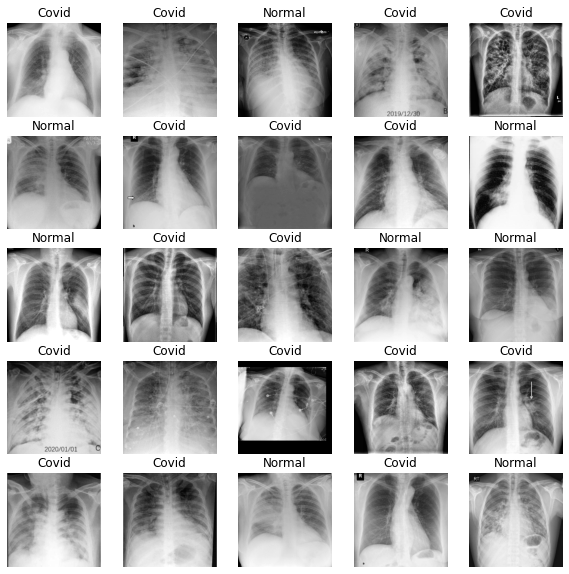

In [19]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(image_batch[n], cmap="gray")
        if label_batch[n]:
            plt.title("Covid")
        else:
            plt.title("Normal")
        plt.axis("off")

show_batch(train_df["image"][:25], train_df["covid(label)"][:25])

In [38]:
from skimage.feature import hog

def getHog(img):
    hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2))
    return hog_image

train_df["hog"] = train_df["image"].apply(getHog)
test_df["hog"] = test_df["image"].apply(getHog)

In [62]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

def run_svm(X_data, y_data):
  
  svc = svm.SVC(kernel='rbf', C=1, gamma="scale")
  scores = cross_val_score(svc, X_data, y_data, cv=5)
  
  return scores


In [67]:
X = np.stack(train_df["image"].to_numpy())
print(X.shape)

(250, 224, 224)


In [ ]:

y = np.stack(train_df["covid(label)"].to_numpy())
acc = run_svm(X,y)
print(sum(acc)/len(acc))

In [63]:
X = np.stack(train_df["hog"].to_numpy())
y = np.stack(train_df["covid(label)"].to_numpy())
acc = run_svm(X,y)
print(sum(acc)/len(acc))

0.632
